In [1]:
import os
import numpy as np

from plotly.offline import init_notebook_mode
import rad_conf
from rad import RadialAttentionModel, ParameterDependence

init_notebook_mode(connected=True)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print("Loading input from '{}'.".format(rad_conf.RAD_DATA_DIR.split('/')[-1]))
print("Saving output in '{}'.".format(rad_conf.RAD_TEMP_DIR.split('/')[-1]))

Loading input from 'data'.
Saving output in 'tmp'.


In [4]:
model = RadialAttentionModel("msol")

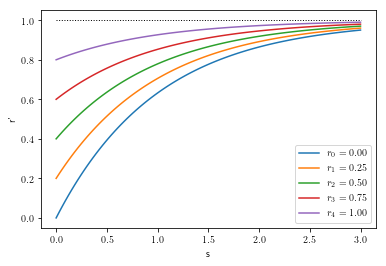

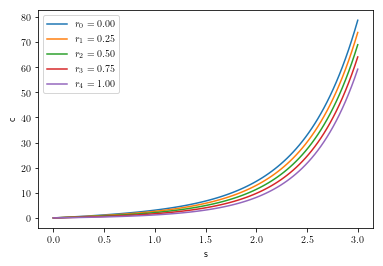

In [5]:
model.save_learning_rsections()
model.save_cost_rsections()

In [6]:
model.variables["v0"].surf_visual()

In [7]:
model.variables["v1"].surf_visual()

In [8]:
model.variables["s"].surf_visual()

In [9]:
model.variables["q"].surf_visual()

In [10]:
rsections = [.1, .5, .7, .9]
xsections = [10.0, 20., 50.0, 100.0]

rsections_indices = model.grids["r"].lower_bound_index(rsections)
rsections_points = {}
for r_ind, r_val in enumerate(rsections_indices):
    idx = np.where(model.variables["s"].data[r_val, :] <= 0)[0][-1]
    rsections_points[r_ind] = ("$\\bar x (r_{})$".format(r_ind), (model.grids["x"].data[idx], 0))

xsections_indices = model.grids["x"].lower_bound_index(xsections)
xsections_points = {}
for x_ind, x_val in enumerate(xsections_indices):
    idx = np.where(model.variables["s"].data[:, x_val] <= 0)[0][0]
    xsections_points[x_ind] = ("$\\bar r (x_{})$".format(x_ind), (model.grids["r"].data[idx], 0))

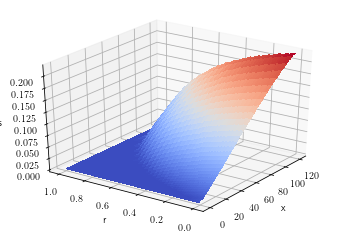

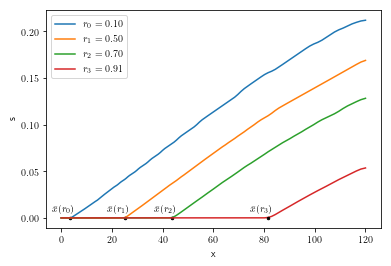

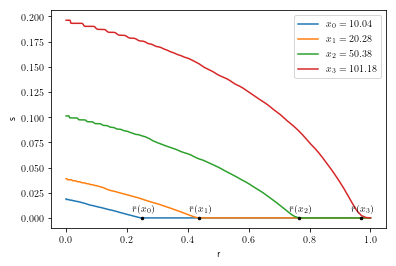

In [11]:
model.variables["s"].save_figs({
    "angle": 215,
    "zlabel": "s",
    "prefix": "spol",
    "xsections": xsections,
    "xsections_points": xsections_points,
    "rsections": rsections,
    "rsections_points": rsections_points
})

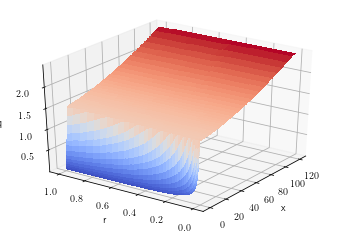

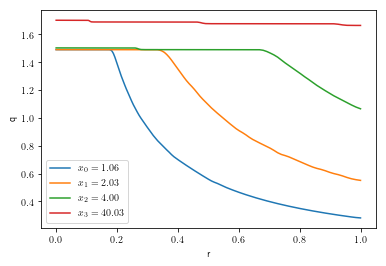

In [12]:
model.variables["q"].save_figs({
    "angle": 215,
    "zlabel": "q",
    "prefix": "qpol",
    "xsections": [1.0, 2., 4.0, 40.0],
    "rsections": [.1, .2, .5, .8]
})

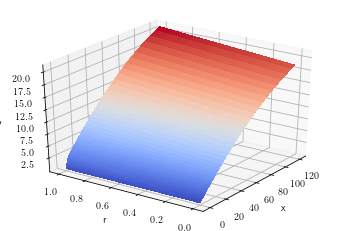

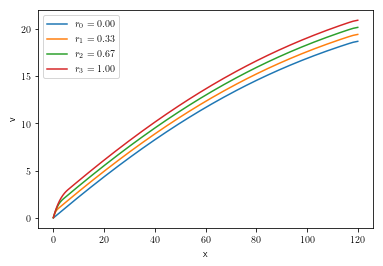

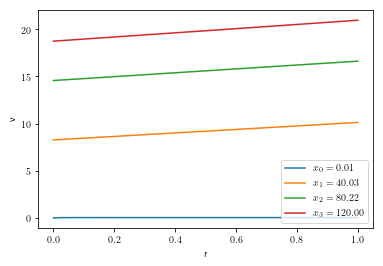

In [13]:
model.variables["v1"].save_figs({
    "angle": 215,
    "zlabel": "v",
    "prefix": "v"
})

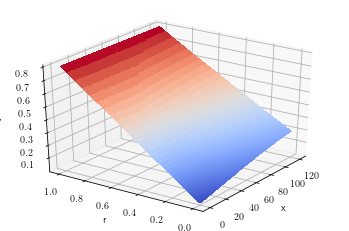

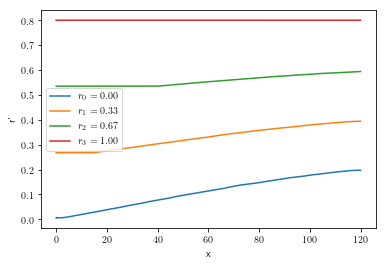

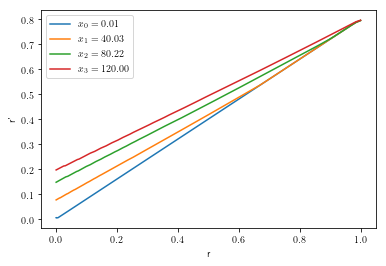

In [14]:
model.get_radius_dynamics().save_figs({
    "angle": 215,
    "zlabel": "r'",
    "prefix": "radt"
})

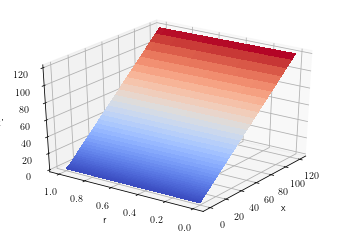

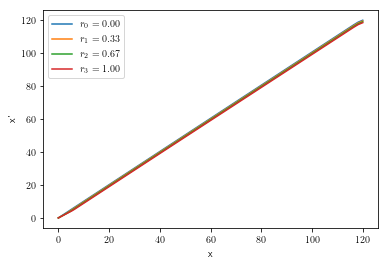

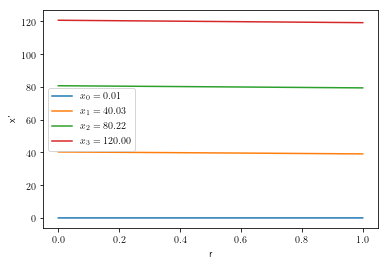

In [15]:
model.get_wealth_dynamics().save_figs({
    "angle": 215,
    "zlabel": "x'",
    "prefix": "wltt"
})

In [16]:
model.save_latex_table("msol.tex")

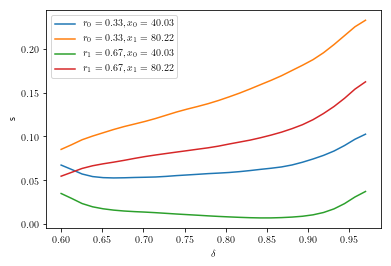

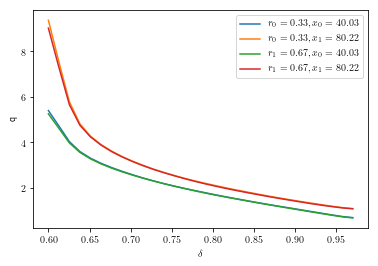

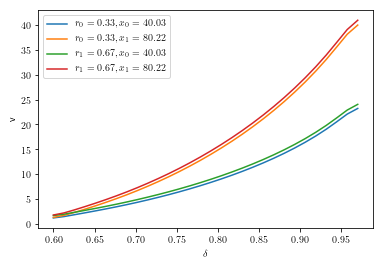

In [17]:
ParameterDependence("delta").save_figs()

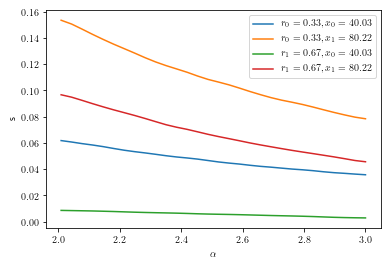

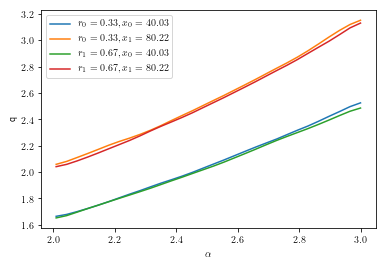

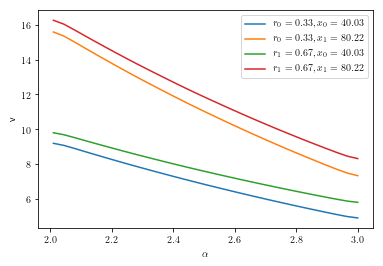

In [18]:
ParameterDependence("alpha").save_figs()

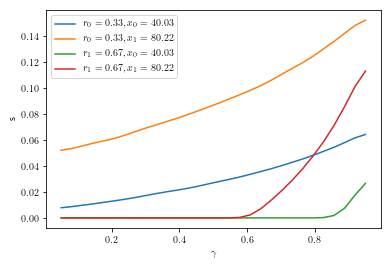

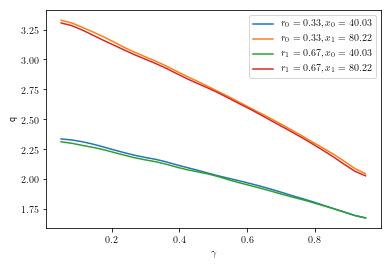

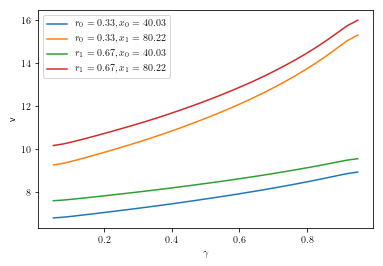

In [19]:
ParameterDependence("gamma").save_figs()